In [1]:
# Initial setup for part 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMAGE_PATH = "../img"
pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

df = pd.read_csv("../liquor_sales.csv")

df

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,1031100.0,American Vodkas,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,1031100.0,American Vodkas,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,INV-41968600007,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1022100.0,Mixto Tequila,434.0,LUXCO INC,87937,Juarez Silver,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805303,INV-41968600008,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1022100.0,Mixto Tequila,434.0,LUXCO INC,89387,Juarez Gold,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805304,INV-41968600009,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1031200.0,American Flavored Vodka,205.0,E & J Gallo Winery,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,3,33.75,2.25,0.59
2805305,INV-41968600006,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,1022200.0,100% Agave Tequila,65.0,Jim Beam Brands,89836,Hornitos Reposado,12,750,13.50,20.25,2,40.50,1.50,0.39


### P1: Data Prep
1. If you are looking at a regression problem, plot the distribution of target values in your
dataset. If classification, plot the distribution of classes. Give a high level summary of
any other pertinent statistics / distributions relevant to your dataset.

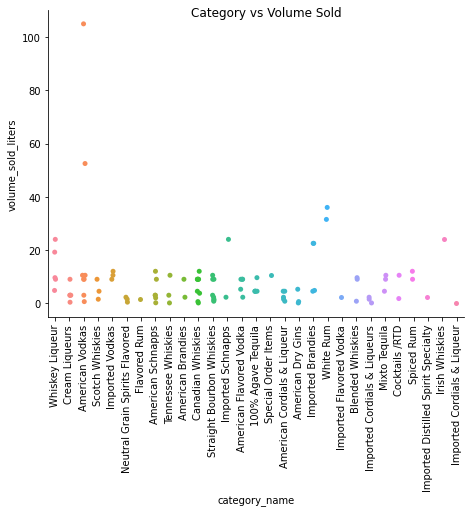

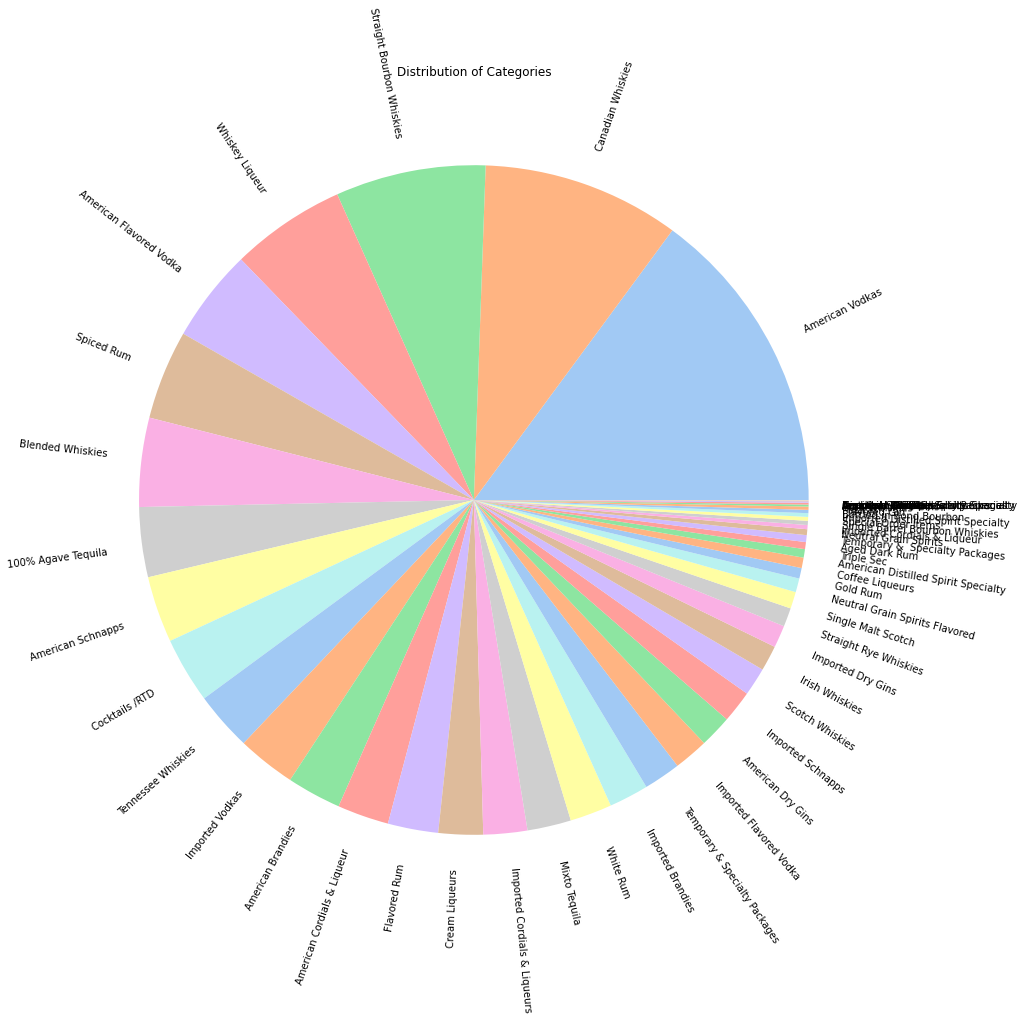

In [2]:
# Distribution of Classes (Categories)
# df2["vendor_number"].value_counts()

catplot = sns.catplot(
    data=df.head(100),
    x="category_name",
    y="volume_sold_liters",
    aspect=1.5
).set_xticklabels(rotation=90)

catplot.fig.suptitle("Category vs Volume Sold")
catplot.savefig("category_vs_volume.png")

plt.show()

plt.figure(figsize=(15, 25))
# df["category_"]
category_list_data = df["category_name"].value_counts(normalize=True)

# print(category_list_data)
category_list_labels = df["category_name"].value_counts().index.tolist()
color_palette = sns.color_palette("pastel")

plt.title("Distribution of Categories")
plt.pie(x=category_list_data,
    labels=category_list_labels,
    colors=color_palette,
    rotatelabels="true")

plt.savefig("dist_of_categories.png")

plt.show()

2. Look for NA or missing values, impute with a value that makes sense, drop the row as a
last resort.

3. Looking at the non-numeric columns in your dataset, decide which columns should be
kept for model training. (hint: any unique identifiers should be dropped)

In [3]:
# Data Sanitation
# Create duplicate to preserve column removals for reference
df2 = df.copy()

# Begin by dropping excess/unneeded columns from data

# Get rid of redundant or excess data
excess_columns = [
    "invoice_and_item_number",  # Only used for identification
    "store_number",           # Could use for prediction
    "store_name",               # Redundant
    "address",                  # Redundant
    "store_location",           # Redundant
    "county_number",            # county exists
    "city",                     # Redundant
    "zip_code",                 # Drop due to difficulty of training
    # "county",                   # County clusters could help predict category
    "category",                 # Redundant; category_name exists
    # "category_name",            # Use for better encoding
    "vendor_number",            # Too specific for prediction
    "vendor_name",              # Redundant; vendor_number exists
    "item_number",              # Redundant; item_description exists
    "item_description",         # Too specific to predict
    "volume_sold_gallons" # Drop because liters equivalent exists
]
df2.drop(columns=excess_columns, inplace=True)

# Convert date to datetime for later usage
df2["date"] = pd.to_datetime(df2["date"])

# Get rid of incomplete entries at this point
df2.dropna(inplace=True)

# Reducing entries from 2022 to avoid adding a bias towards repeating months
df2 = df2.query("date < 2022")

# Eliminating categories that had less than 1000 instances
df2 = df2[df2.groupby("category_name")["category_name"].transform("size") > 1000]

print(len(df2["category_name"].value_counts()))

label_names = df2["category_name"]

df2

45


,date,county,category_name,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters
0,2021-01-04,BUENA VIST,Whiskey Liqueur,48,100,0.90,1.35,48,64.80,4.80
1,2021-01-04,DUBUQUE,Cream Liqueurs,12,750,11.50,17.25,4,69.00,3.00
2,2021-01-04,HARDIN,American Vodkas,6,1750,14.75,22.13,6,132.78,10.50
3,2021-01-04,HARDIN,American Vodkas,12,750,3.31,4.97,12,59.64,9.00
4,2021-01-04,POLK,Scotch Whiskies,12,750,20.99,31.49,2,62.98,1.50
...,...,...,...,...,...,...,...,...,...,...
2805302,2021-11-14,POLK,Mixto Tequila,12,1000,7.83,11.75,1,11.75,1.00
2805303,2021-11-14,POLK,Mixto Tequila,12,1000,7.83,11.75,1,11.75,1.00
2805304,2021-11-14,POLK,American Flavored Vodka,12,750,7.50,11.25,3,33.75,2.25
2805305,2021-11-14,POLK,100% Agave Tequila,12,750,13.50,20.25,2,40.50,1.50


4. Of the set of non-numeric columns, decide which should be label-encoded, and which
should be one-hot encoded, and then carry this out on the dataset.

5. Create at least 3 aggregation columns. This could be mean, std deviation, min/max,
counts, and so on of other likely important columns. It is your choice which columns and
which functions. This can easily be done with transforms(as we have done numerous
times before) or pd.agg

In [4]:
# Create aggregation columns

# Aggregate by category
# Mean of bottles sold
df2["category_std"] = df2.groupby("category_name")["bottles_sold"].transform("mean")

# Mean Packs Ordered
df2["category_mean_packs"] = df2.groupby("category_name")["pack"].transform("mean")

# Min of Packs Ordered
df2["category_min_packs"] = df2.groupby("category_name")["pack"].transform("min")

# Max of Packs Ordered
df2["category_max_packs"] = df2.groupby("category_name")["pack"].transform("max")

df2

,date,county,category_name,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,category_std,category_mean_packs,category_min_packs,category_max_packs
0,2021-01-04,BUENA VIST,Whiskey Liqueur,48,100,0.90,1.35,48,64.80,4.80,27.305556,17.068361,1,48
1,2021-01-04,DUBUQUE,Cream Liqueurs,12,750,11.50,17.25,4,69.00,3.00,7.912980,9.821276,1,24
2,2021-01-04,HARDIN,American Vodkas,6,1750,14.75,22.13,6,132.78,10.50,15.700138,12.734162,1,48
3,2021-01-04,HARDIN,American Vodkas,12,750,3.31,4.97,12,59.64,9.00,15.700138,12.734162,1,48
4,2021-01-04,POLK,Scotch Whiskies,12,750,20.99,31.49,2,62.98,1.50,6.072110,9.780465,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,2021-11-14,POLK,Mixto Tequila,12,1000,7.83,11.75,1,11.75,1.00,14.201307,13.877450,6,48
2805303,2021-11-14,POLK,Mixto Tequila,12,1000,7.83,11.75,1,11.75,1.00,14.201307,13.877450,6,48
2805304,2021-11-14,POLK,American Flavored Vodka,12,750,7.50,11.25,3,33.75,2.25,8.367083,12.641560,6,48
2805305,2021-11-14,POLK,100% Agave Tequila,12,750,13.50,20.25,2,40.50,1.50,9.275106,9.377832,2,48


In [5]:
from sklearn import preprocessing

# Use one-hot encoding on country 
df2 = pd.get_dummies(df2, columns=["county"])

# Due to prediction, LabelEncoder should be used for category_name
# Otherwise it will get too complex trying to target 50+ columns for the correct category
# Wiki says to use this on target value and not input, which aligns with the goal
label_enc = preprocessing.LabelEncoder()
df2["category_name"] = label_enc.fit_transform(df2["category_name"])

df2

,date,category_name,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,category_std,category_mean_packs,category_min_packs,category_max_packs,county_ADAIR,county_ADAMS,county_ALLAMAKEE,county_APPANOOSE,county_AUDUBON,county_Adair,county_BENTON,county_BLACK HAWK,county_BOONE,county_BREMER,county_BUCHANAN,county_BUENA VIST,county_BUTLER,county_Black Hawk,county_CALHOUN,county_CARROLL,county_CASS,county_CEDAR,county_CERRO GORD,county_CHEROKEE,county_CHICKASAW,county_CLARKE,county_CLAY,county_CLAYTON,county_CLINTON,county_CRAWFORD,county_DALLAS,county_DAVIS,county_DECATUR,county_DELAWARE,county_DES MOINES,county_DICKINSON,county_DUBUQUE,county_Dallas,county_Delaware,county_Des Moines,county_EMMET,county_FAYETTE,county_FLOYD,county_FRANKLIN,county_FREMONT,county_GREENE,county_GRUNDY,county_GUTHRIE,county_HAMILTON,county_HANCOCK,county_HARDIN,county_HARRISON,county_HENRY,county_HOWARD,county_HUMBOLDT,county_Hancock,county_Hardin,county_Henry,county_IDA,county_IOWA,county_Iowa,county_JACKSON,county_JASPER,county_JEFFERSON,county_JOHNSON,county_JONES,county_Jackson,county_KEOKUK,county_KOSSUTH,county_LEE,county_LINN,county_LOUISA,county_LUCAS,county_LYON,county_Linn,county_MADISON,county_MAHASKA,county_MARION,county_MARSHALL,county_MILLS,county_MITCHELL,county_MONONA,county_MONROE,county_MONTGOMERY,county_MUSCATINE,county_Madison,county_Marion,county_Marshall,county_OBRIEN,county_OSCEOLA,county_PAGE,county_PALO ALTO,county_PLYMOUTH,county_POCAHONTAS,county_POLK,county_POTTAWATTA,county_POWESHIEK,county_Polk,county_Pottawatta,county_Poweshiek,county_RINGGOLD,county_SAC,county_SCOTT,county_SHELBY,county_SIOUX,county_STORY,county_Scott,county_TAMA,county_TAYLOR,county_UNION,county_VAN BUREN,county_WAPELLO,county_WARREN,county_WASHINGTON,county_WAYNE,county_WEBSTER,county_WINNEBAGO,county_WINNESHIEK,county_WOODBURY,county_WORTH,county_WRIGHT,county_Wapello,county_Webster
0,2021-01-04,43,48,100,0.90,1.35,48,64.80,4.80,27.305556,17.068361,1,48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-01-04,15,12,750,11.50,17.25,4,69.00,3.00,7.912980,9.821276,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2021-01-04,8,6,1750,14.75,22.13,6,132.78,10.50,15.700138,12.734162,1,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2021-01-04,8,12,750,3.31,4.97,12,59.64,9.00,15.700138,12.734162,1,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2021-01-04,32,12,750,20.99,31.49,2,62.98,1.50,6.072110,9.780465,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

7. Split your data into features (x_data) and labels (y_data)

In [6]:
# Split by time (3 months of training)

# Change these so that they represent feature/label 

# Input
feature_data = df2.drop(columns=["date", "category_name"])


# Output
label_data = df2["category_name"]

# Make a copy to preserve columns
feature_names = feature_data.copy()

feature_data
# label_data

,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,category_std,category_mean_packs,category_min_packs,category_max_packs,county_ADAIR,county_ADAMS,county_ALLAMAKEE,county_APPANOOSE,county_AUDUBON,county_Adair,county_BENTON,county_BLACK HAWK,county_BOONE,county_BREMER,county_BUCHANAN,county_BUENA VIST,county_BUTLER,county_Black Hawk,county_CALHOUN,county_CARROLL,county_CASS,county_CEDAR,county_CERRO GORD,county_CHEROKEE,county_CHICKASAW,county_CLARKE,county_CLAY,county_CLAYTON,county_CLINTON,county_CRAWFORD,county_DALLAS,county_DAVIS,county_DECATUR,county_DELAWARE,county_DES MOINES,county_DICKINSON,county_DUBUQUE,county_Dallas,county_Delaware,county_Des Moines,county_EMMET,county_FAYETTE,county_FLOYD,county_FRANKLIN,county_FREMONT,county_GREENE,county_GRUNDY,county_GUTHRIE,county_HAMILTON,county_HANCOCK,county_HARDIN,county_HARRISON,county_HENRY,county_HOWARD,county_HUMBOLDT,county_Hancock,county_Hardin,county_Henry,county_IDA,county_IOWA,county_Iowa,county_JACKSON,county_JASPER,county_JEFFERSON,county_JOHNSON,county_JONES,county_Jackson,county_KEOKUK,county_KOSSUTH,county_LEE,county_LINN,county_LOUISA,county_LUCAS,county_LYON,county_Linn,county_MADISON,county_MAHASKA,county_MARION,county_MARSHALL,county_MILLS,county_MITCHELL,county_MONONA,county_MONROE,county_MONTGOMERY,county_MUSCATINE,county_Madison,county_Marion,county_Marshall,county_OBRIEN,county_OSCEOLA,county_PAGE,county_PALO ALTO,county_PLYMOUTH,county_POCAHONTAS,county_POLK,county_POTTAWATTA,county_POWESHIEK,county_Polk,county_Pottawatta,county_Poweshiek,county_RINGGOLD,county_SAC,county_SCOTT,county_SHELBY,county_SIOUX,county_STORY,county_Scott,county_TAMA,county_TAYLOR,county_UNION,county_VAN BUREN,county_WAPELLO,county_WARREN,county_WASHINGTON,county_WAYNE,county_WEBSTER,county_WINNEBAGO,county_WINNESHIEK,county_WOODBURY,county_WORTH,county_WRIGHT,county_Wapello,county_Webster
0,48,100,0.90,1.35,48,64.80,4.80,27.305556,17.068361,1,48,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,750,11.50,17.25,4,69.00,3.00,7.912980,9.821276,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,1750,14.75,22.13,6,132.78,10.50,15.700138,12.734162,1,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,12,750,3.31,4.97,12,59.64,9.00,15.700138,12.734162,1,48,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,12,750,20.99,31.49,2,62.98,1.50,6.072110,9.780465,1,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,12,1000,7.83,11.75,1,11.75,1.00,14.201307,13.877450,6,48,0,0

8. Using a scaling/normalization library of your choice, scale / normalize your data

In [7]:
# Scale data
data_scaler = preprocessing.StandardScaler()
feature_data = data_scaler.fit_transform(feature_data)

feature_data

array([[ 4.59449805, -1.37265478, -0.94323832, ..., -0.05431525,
        -0.0484355 , -0.02907739],
       [ 0.00750701, -0.13647852,  0.01622698, ..., -0.05431525,
        -0.0484355 , -0.02907739],
       [-0.7569915 ,  1.76533111,  0.31040266, ..., -0.05431525,
        -0.0484355 , -0.02907739],
       ...,
       [ 0.00750701, -0.13647852, -0.3458354 , ..., -0.05431525,
        -0.0484355 , -0.02907739],
       [ 0.00750701, -0.13647852,  0.19725817, ..., -0.05431525,
        -0.0484355 , -0.02907739],
       [ 0.00750701, -0.13647852, -0.02903082, ..., -0.05431525,
        -0.0484355 , -0.02907739]])

9. Split your data into a test and training set randomly, with 10% of the data for the test set.

In [8]:
from sklearn import model_selection

# Split data to train and test
# Train with 10% of test set
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    feature_data,
    label_data,
    test_size=0.10, # Proportion of dataset in float 0-1
    random_state=5  # Seed to randomize shuffle
)

# x_train # good
# x_test # good
# y_train # good
# y_test # good

### P2: Training

1. If you are aiming for classification, import the supervised learning models, linear
regression and decision tree classifier from sklearn. If regression, import linear regression
and logistic regression

2. Fit / train both models on the training dataset / labels

In [9]:
# Import models
from sklearn import linear_model, tree

# Create and apply linear regression model
lin_reg_model = linear_model.LinearRegression()
lin_reg_model = lin_reg_model.fit(x_train, y_train)

In [10]:
# Create and apply decision tree classifier
decision_tree_clf = tree.DecisionTreeClassifier()
decision_tree_clf = decision_tree_clf.fit(x_train, y_train)

### P3: Post Model Analysis
1. Use model.score on your test set / labels to get an idea of accuracy
2. Print a comparison of the two models’ accuracy

In [11]:
print("Linear Regression Accuracy:", lin_reg_model.score(x_test, y_test))
print("Decision Tree Classifier Accuracy:", decision_tree_clf.score(x_test, y_test))


Linear Regression Accuracy: 0.1436002377461134
Decision Tree Classifier Accuracy: 1.0


3. Change the distribution of training-test data to 20% test, 30% test.. All the way to 90%
test 10% train. Store this data and plot the relationship between accuracy and percent of
training data.

In [12]:
lin_reg_accuracy = []
decision_tree_accuracy = []

def calculate_and_store_accuracy(percent, feature, label):
    # Recalculate data splits
    # train_size + test_size will scale, sums to 1 when left as None
    x_train, x_test, y_train, y_test = model_selection.train_test_split(
        feature,
        label,
        test_size=percent, # Proportion of dataset in float 0-1
        random_state=5  # Seed to randomize shuffle
    )

    # Generate linear regression model
    lin_reg_model = linear_model.LinearRegression()
    lin_reg_model = lin_reg_model.fit(x_train, y_train)

    # Generate decision tree classifier
    decision_tree_clf = tree.DecisionTreeClassifier()
    decision_tree_clf = decision_tree_clf.fit(x_train, y_train)

    # Collect and store accuracy history
    lin_reg_accuracy.append(lin_reg_model.score(x_test, y_test))
    decision_tree_accuracy.append(decision_tree_clf.score(x_test, y_test))

# Change training data ratio from 10% to 90%
for num in range(1, 10):
    calculate_and_store_accuracy(num / 10, feature_data, label_data)

print(lin_reg_accuracy)
print(decision_tree_accuracy)

[0.1436002377461134, 0.1482966852150559, 0.1448501462002889, 0.14775202796438558, 0.14623859916380244, 0.14688284651380445, 0.148751396127903, 0.15042739033084762, 0.1459614154427077]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
[0.1436002377461134, 0.1482966852150559, 0.1448501462002889, 0.14775202796438558, 0.14623859916380244, 0.14688284651380445, 0.148751396127903, 0.15042739033084762, 0.1459614154427077]


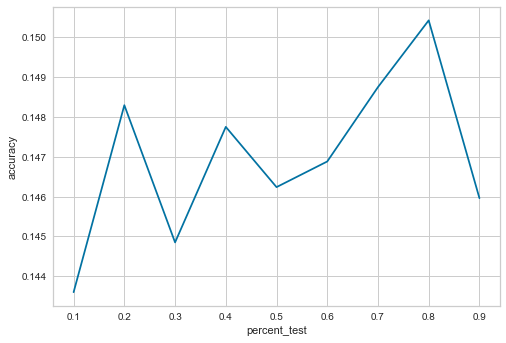

In [30]:
percents = [num / 10 for num in range (1, 10)]

print(percents)
print(lin_reg_accuracy)

relate_df = pd.DataFrame(
    {"percent_test": percents,
    "accuracy": lin_reg_accuracy}
)

sns.lineplot(data=relate_df, x="percent_test", y="accuracy").figure.savefig("lin_reg.png")

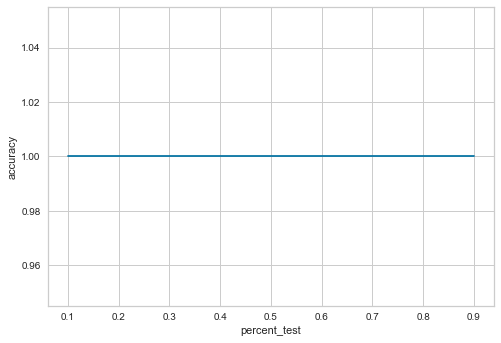

In [34]:
percents = [num / 10 for num in range (1, 10)]

relate_df2 = pd.DataFrame(
    {"percent_test": percents,
    "accuracy": decision_tree_accuracy}
)

sns.lineplot(data=relate_df2, x="percent_test", y="accuracy").figure.savefig("tree_percent.png")

4. Using a residuals library of your choice, plot the residuals from the linear regression
model. If you chose a classification problem, this plot will look slightly strange.


<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

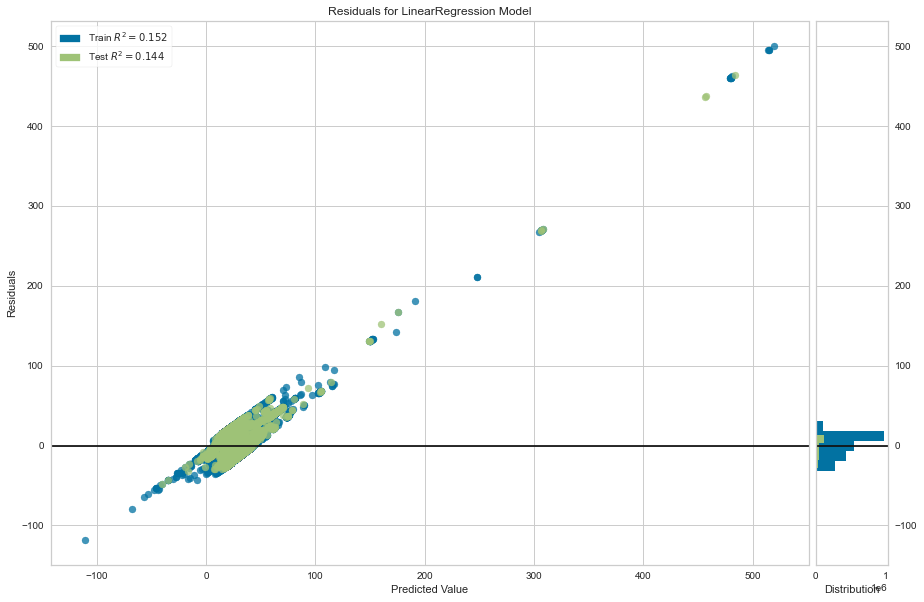

In [13]:
from yellowbrick.regressor import ResidualsPlot

plt.figure(figsize=(15, 10))

visual = ResidualsPlot(lin_reg_model)
visual.fit(x_train, y_train)
visual.score(x_test, y_test)
# visual.poof()

visual.show(outpath="residual_plot.png")

5. If you chose classification, find a way to plot or visualize the performance of the decision
tree classifier, if regression, do this for the logistic regression model. I expect you to do
your own research on the model and check out a few articles showing how people
typically plot this, and explore the performance on your own. I am giving flexibility here
as long as I see you did some research.

|--- category_std <= 0.68
|   |--- category_std <= 0.02
|   |   |--- category_mean_packs <= 0.31
|   |   |   |--- category_mean_packs <= -0.48
|   |   |   |   |--- category_mean_packs <= -0.63
|   |   |   |   |   |--- category_max_packs <= 0.59
|   |   |   |   |   |   |--- category_std <= -0.60
|   |   |   |   |   |   |   |--- category_max_packs <= -0.32
|   |   |   |   |   |   |   |   |--- category_max_packs <= -1.05
|   |   |   |   |   |   |   |   |   |--- category_mean_packs <= -0.98
|   |   |   |   |   |   |   |   |   |   |--- category_mean_packs <= -1.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 9
|   |   |   |   |   |   |   |   |   |   |--- category_mean_packs >  -1.00
|   |   |   |   |   |   |   |   |   |   |   |--- class: 32
|   |   |   |   |   |   |   |   |   |--- category_mean_packs >  -0.98
|   |   |   |   |   |   |   |   |   |   |--- category_std <= -0.75
|   |   |   |   |   |   |   |   |   |   |   |--- class: 15
|   |   |   |   |   |   |   

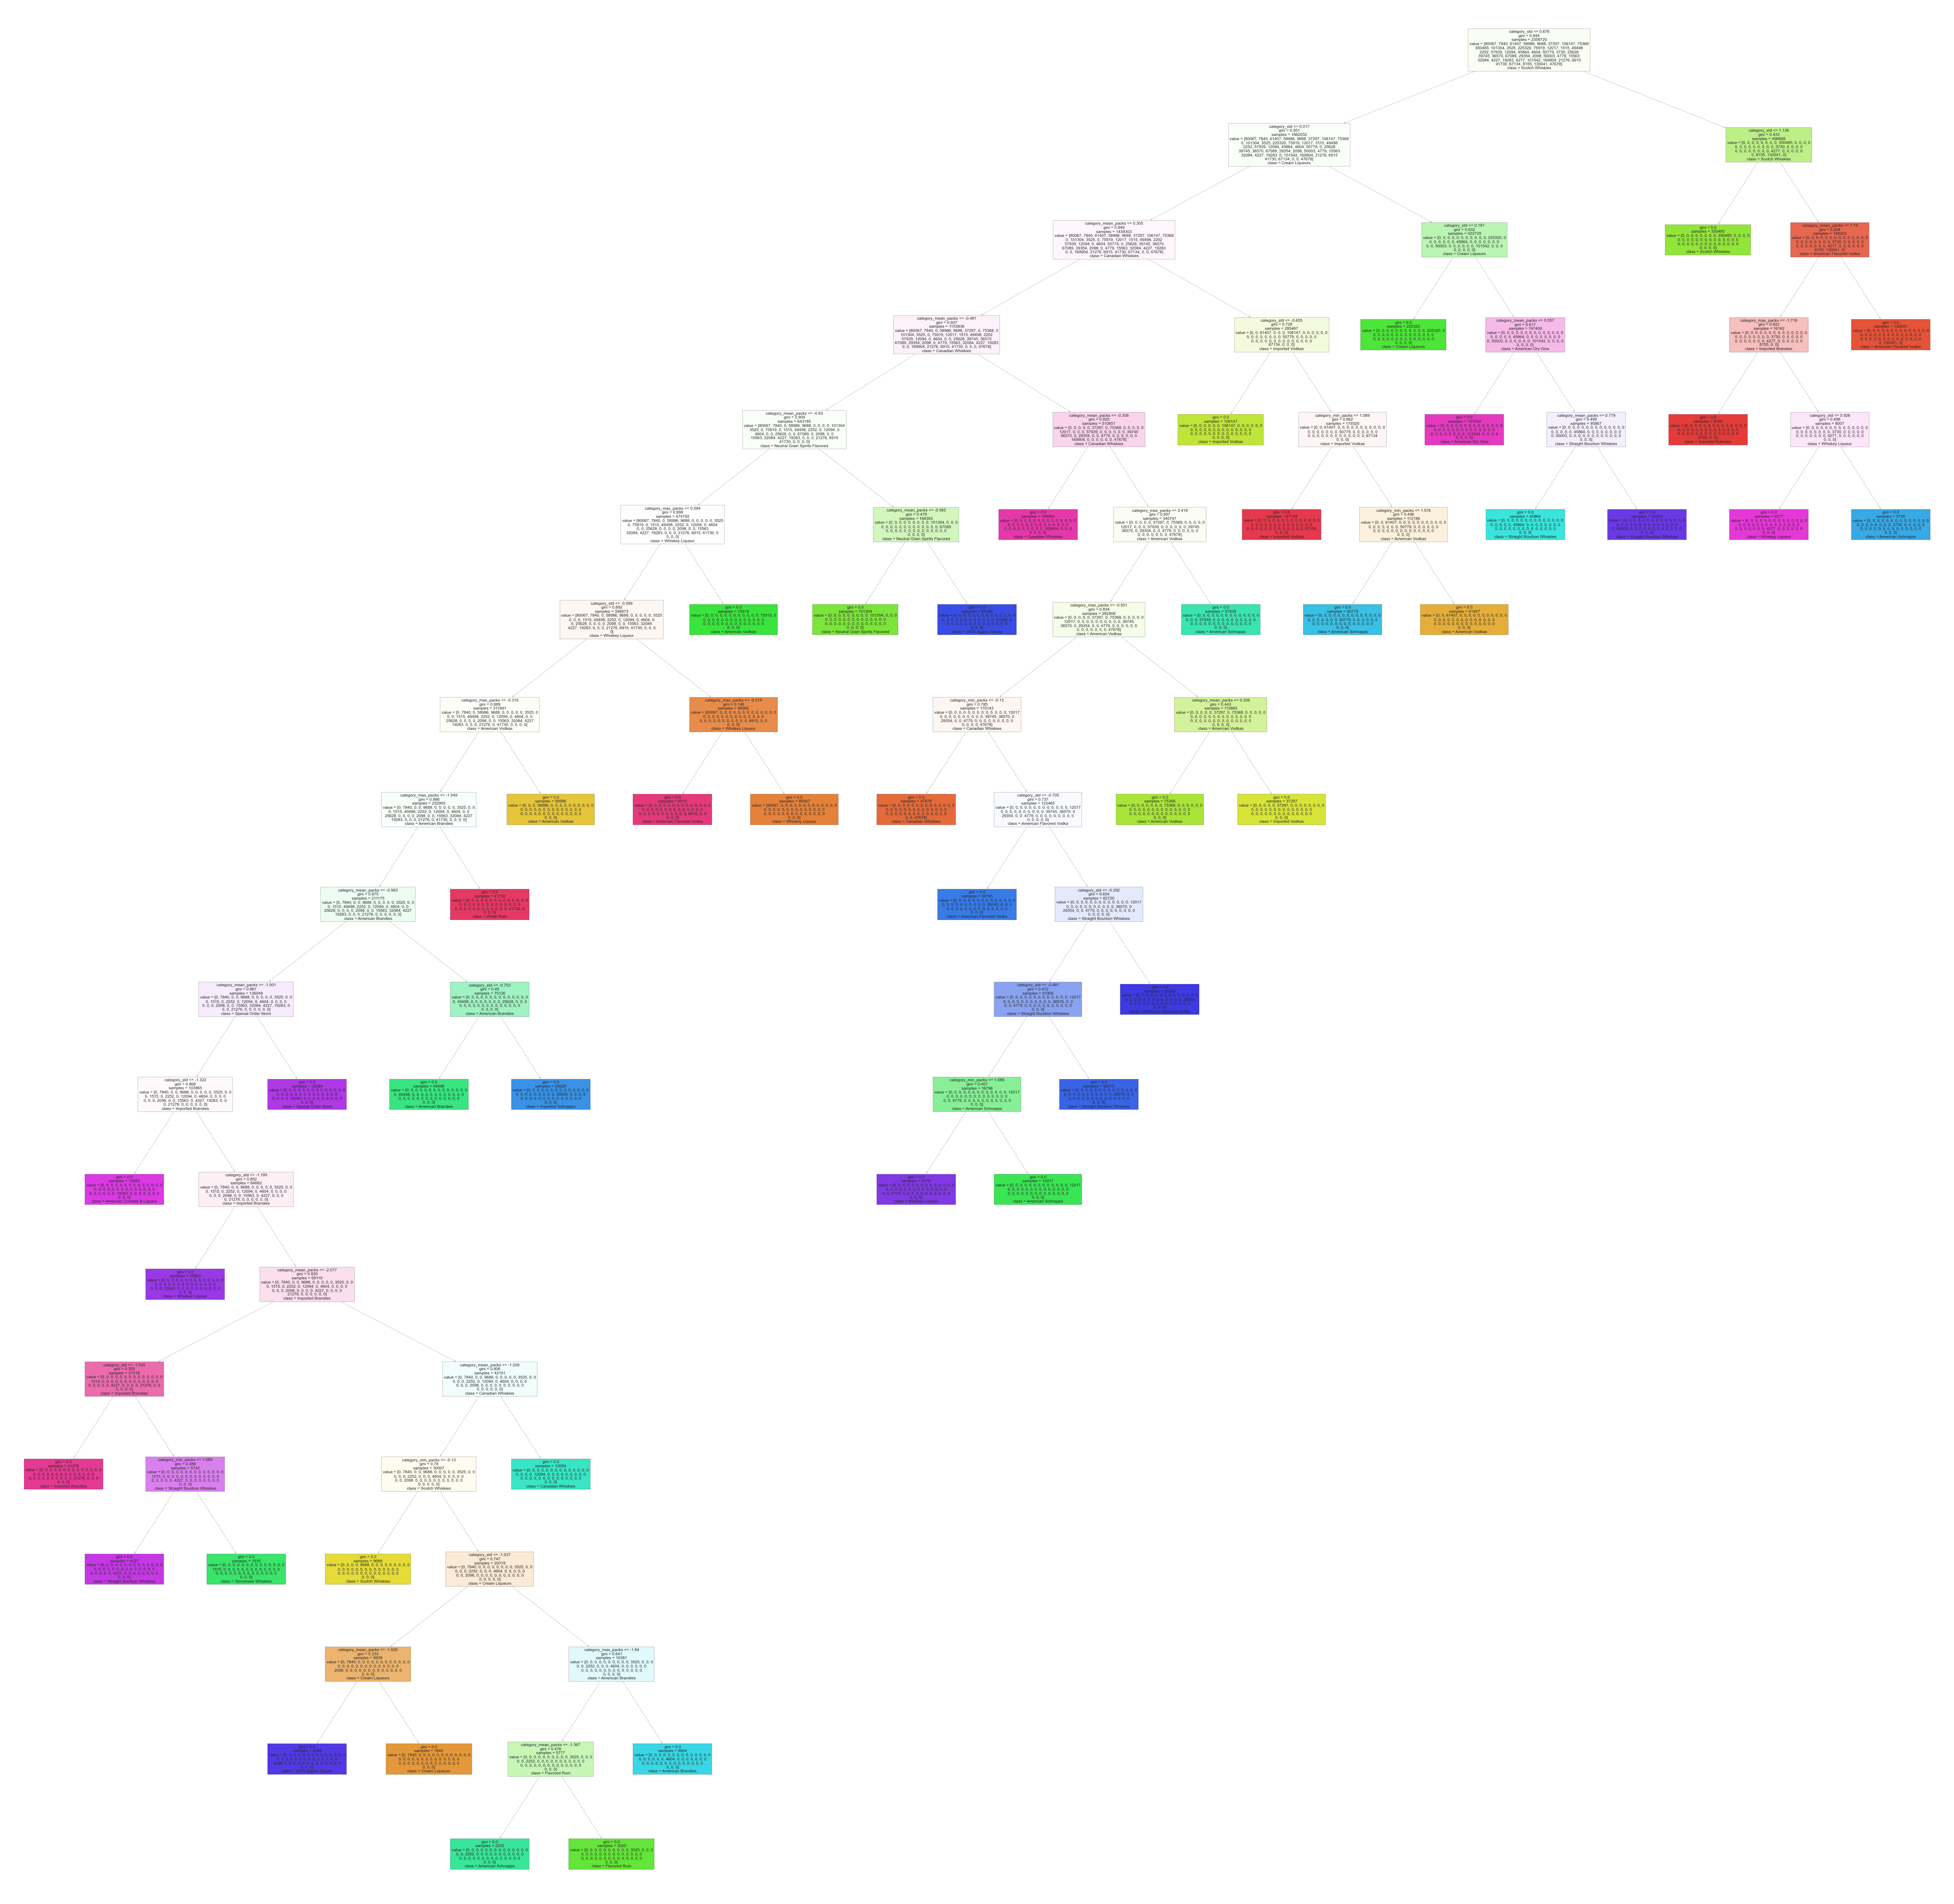

In [14]:
text = tree.export_text(decision_tree_clf, feature_names=feature_names.columns.tolist())

tree_plot = plt.figure(figsize=(100, 100))
_ = tree.plot_tree(
    decision_tree_clf,
    feature_names=feature_names.columns.tolist(),
    class_names=label_names.values.tolist(),
    filled=True
)

tree_plot.savefig("decision_tree.png")

print(text)